Nama : Tazkia Damayanti

Nim : 202110370311090

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import yellowbrick
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

In [6]:
url = 'https://drive.google.com/file/d/18oEcgmOYE1H0LJgEQNslwnQkJeYuxnq9/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# EDA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df = df.drop(['CUST_ID'], axis=1)

In [9]:
# Menghapus baris yang mengandung nilai null
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


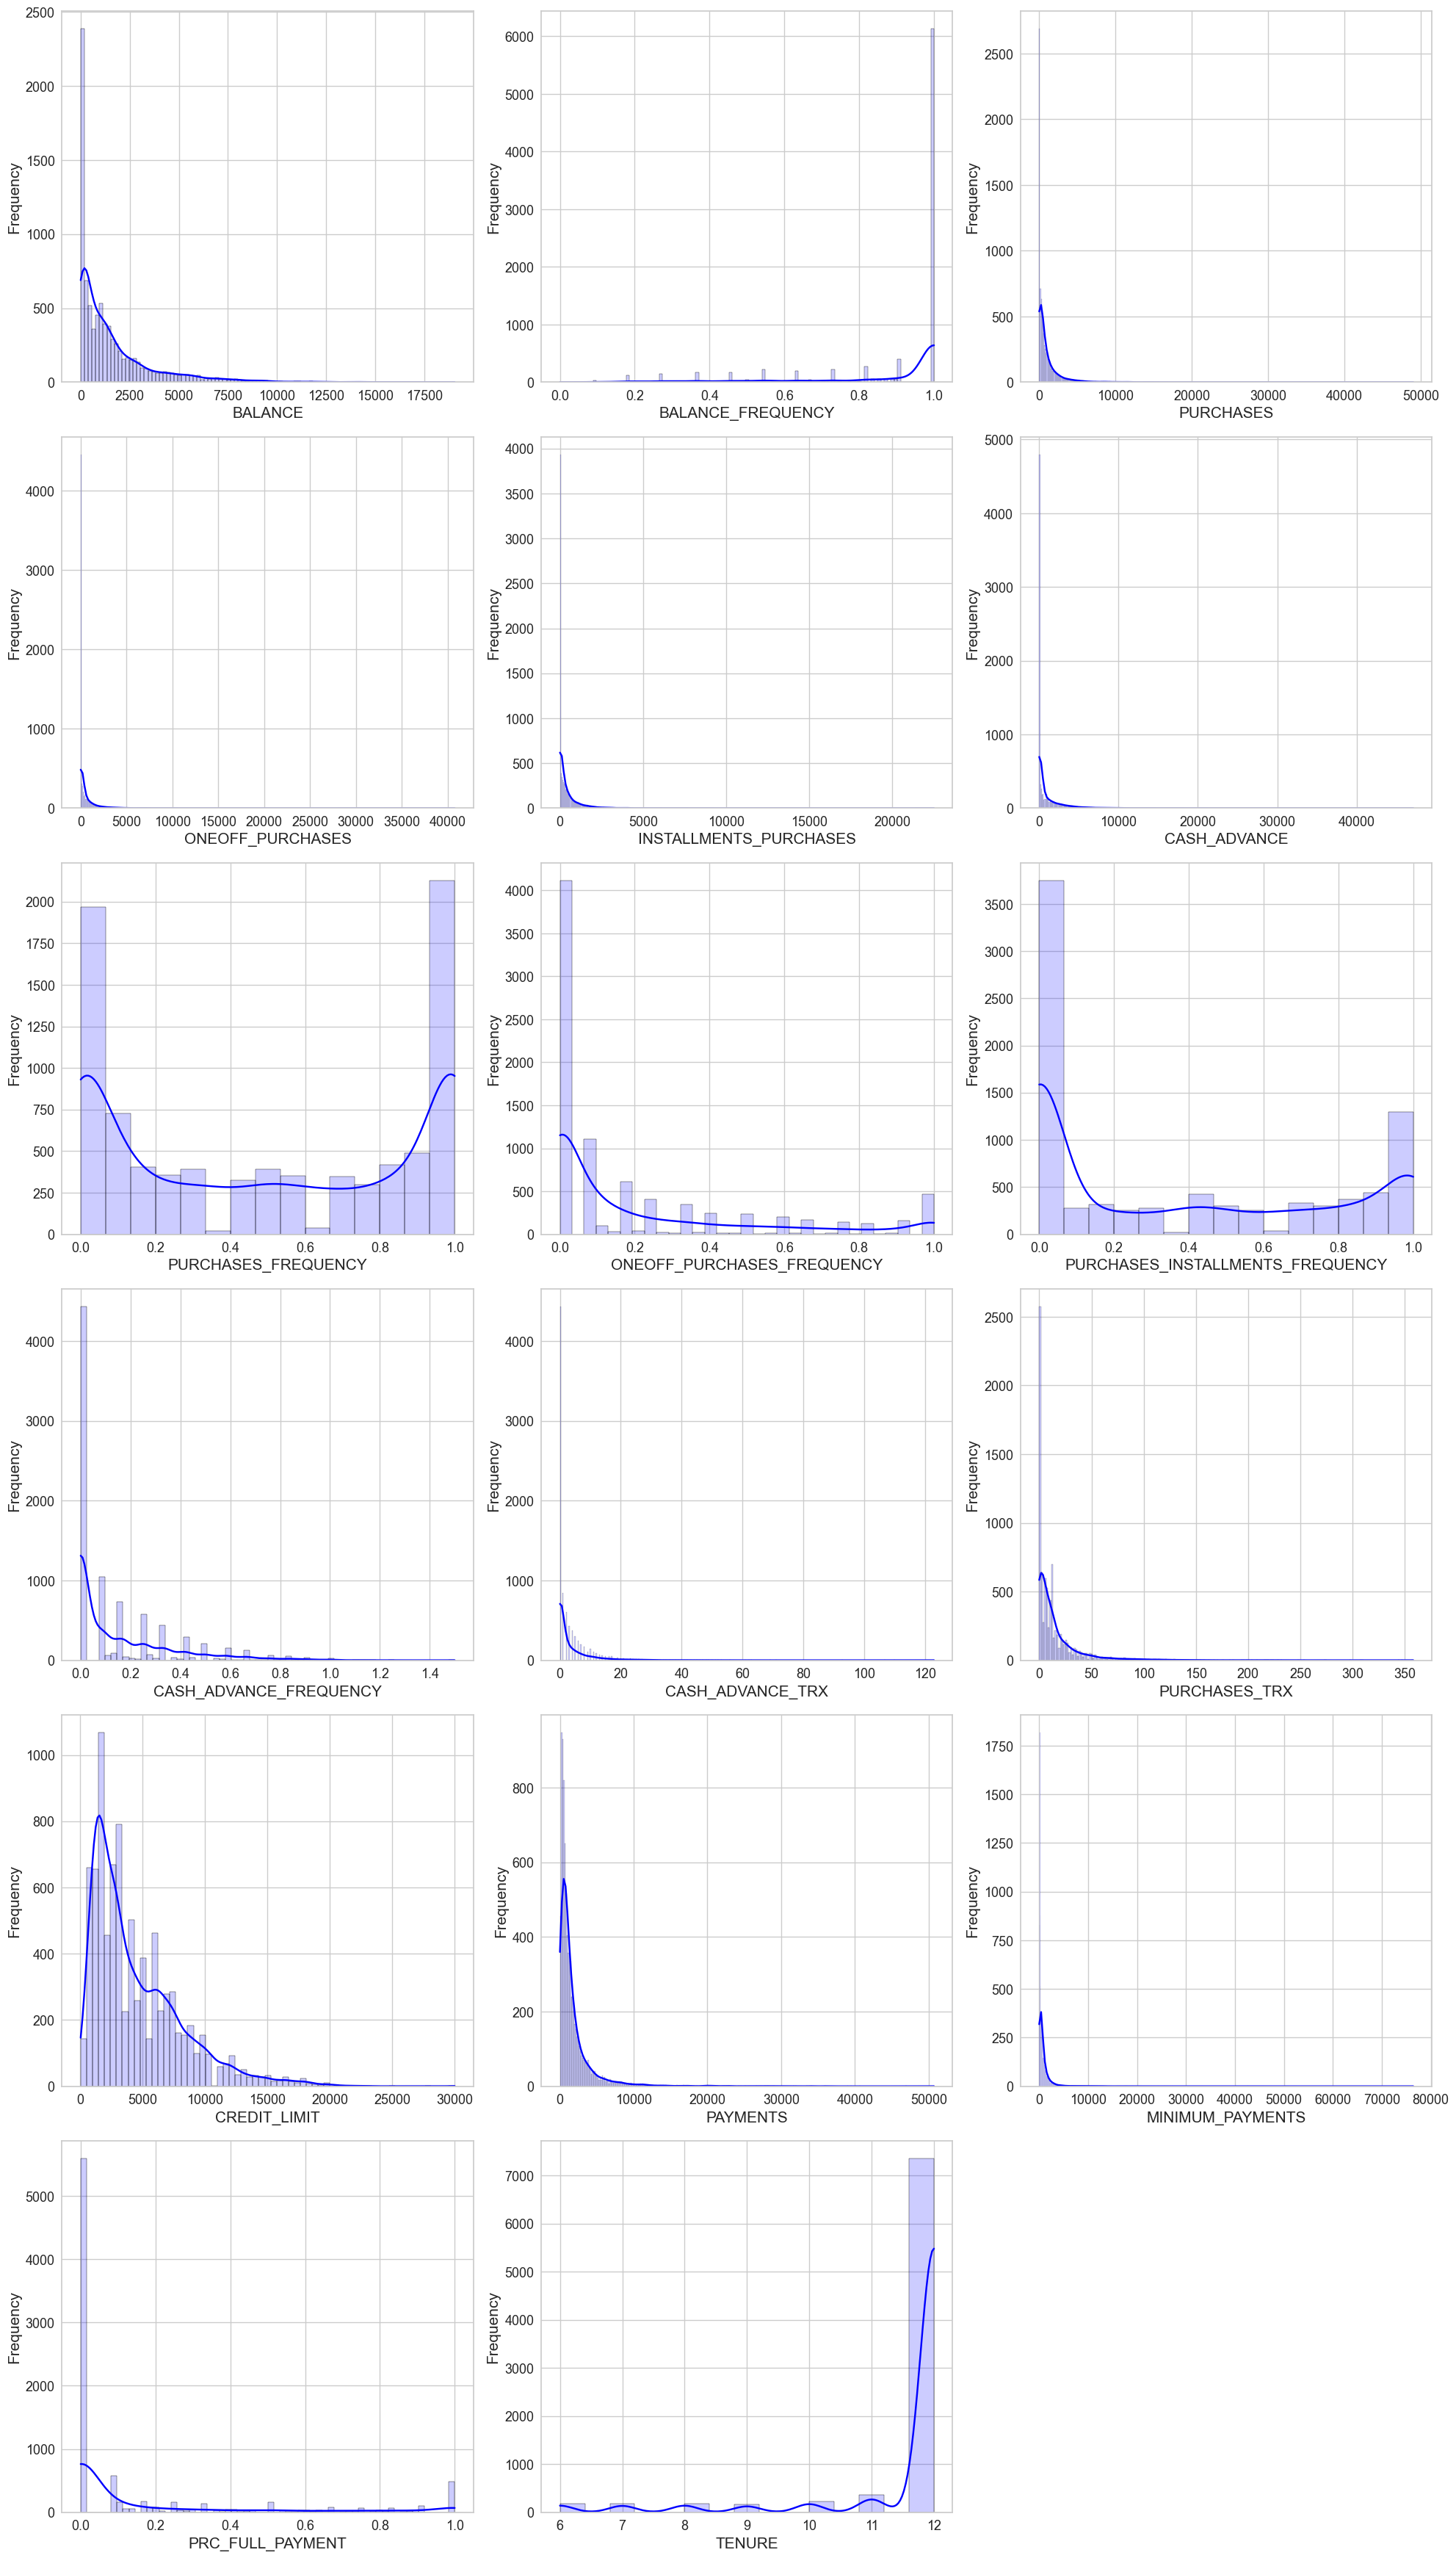

In [12]:
# Creating histograms for each feature
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.histplot(df, x = col, ax = ax, color = 'blue', kde = True, alpha = 0.2)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

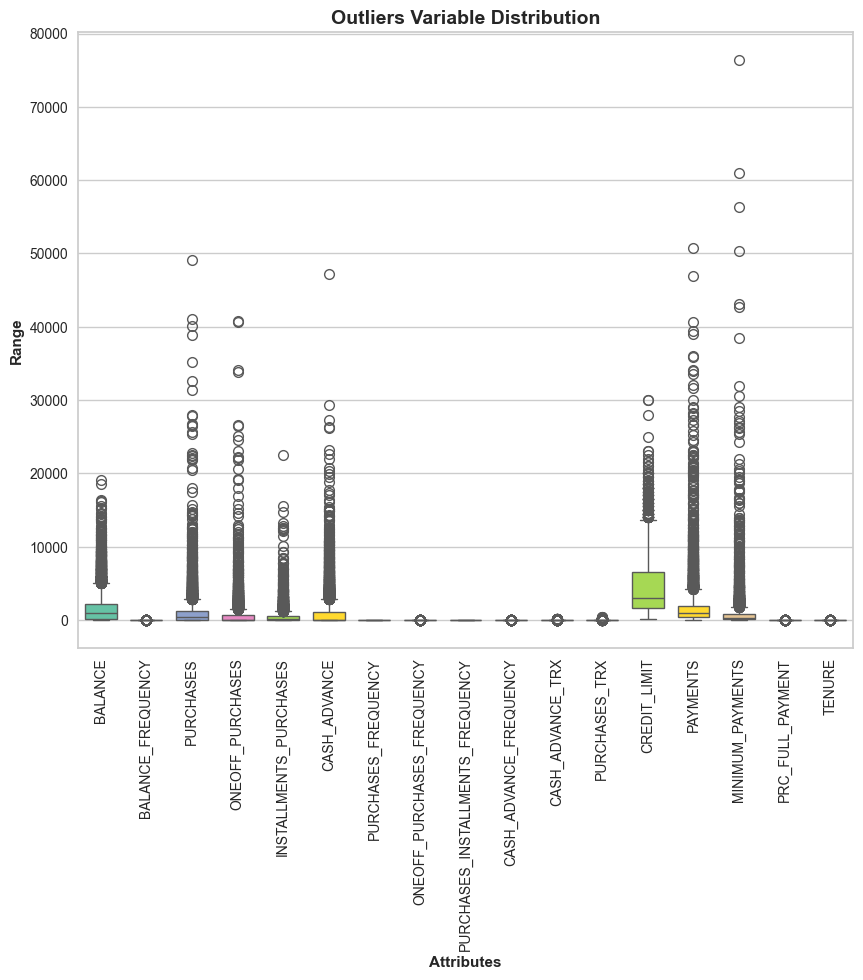

In [13]:
# Impor modul-modul yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis Outlier
num_attributes = [x for x in df.columns if df[x].dtype in ('float64','int64')]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[num_attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()


In [14]:
# List of columns to remove outliers from
columns_to_clean = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for column in columns_to_clean:
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]


# Feature engineering

In [15]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

In [16]:
# Feature Engineering
def feature_engg(column):
    column = np.sqrt(column)
    return column

for col in cols:
    df[col] = feature_engg(df[col])

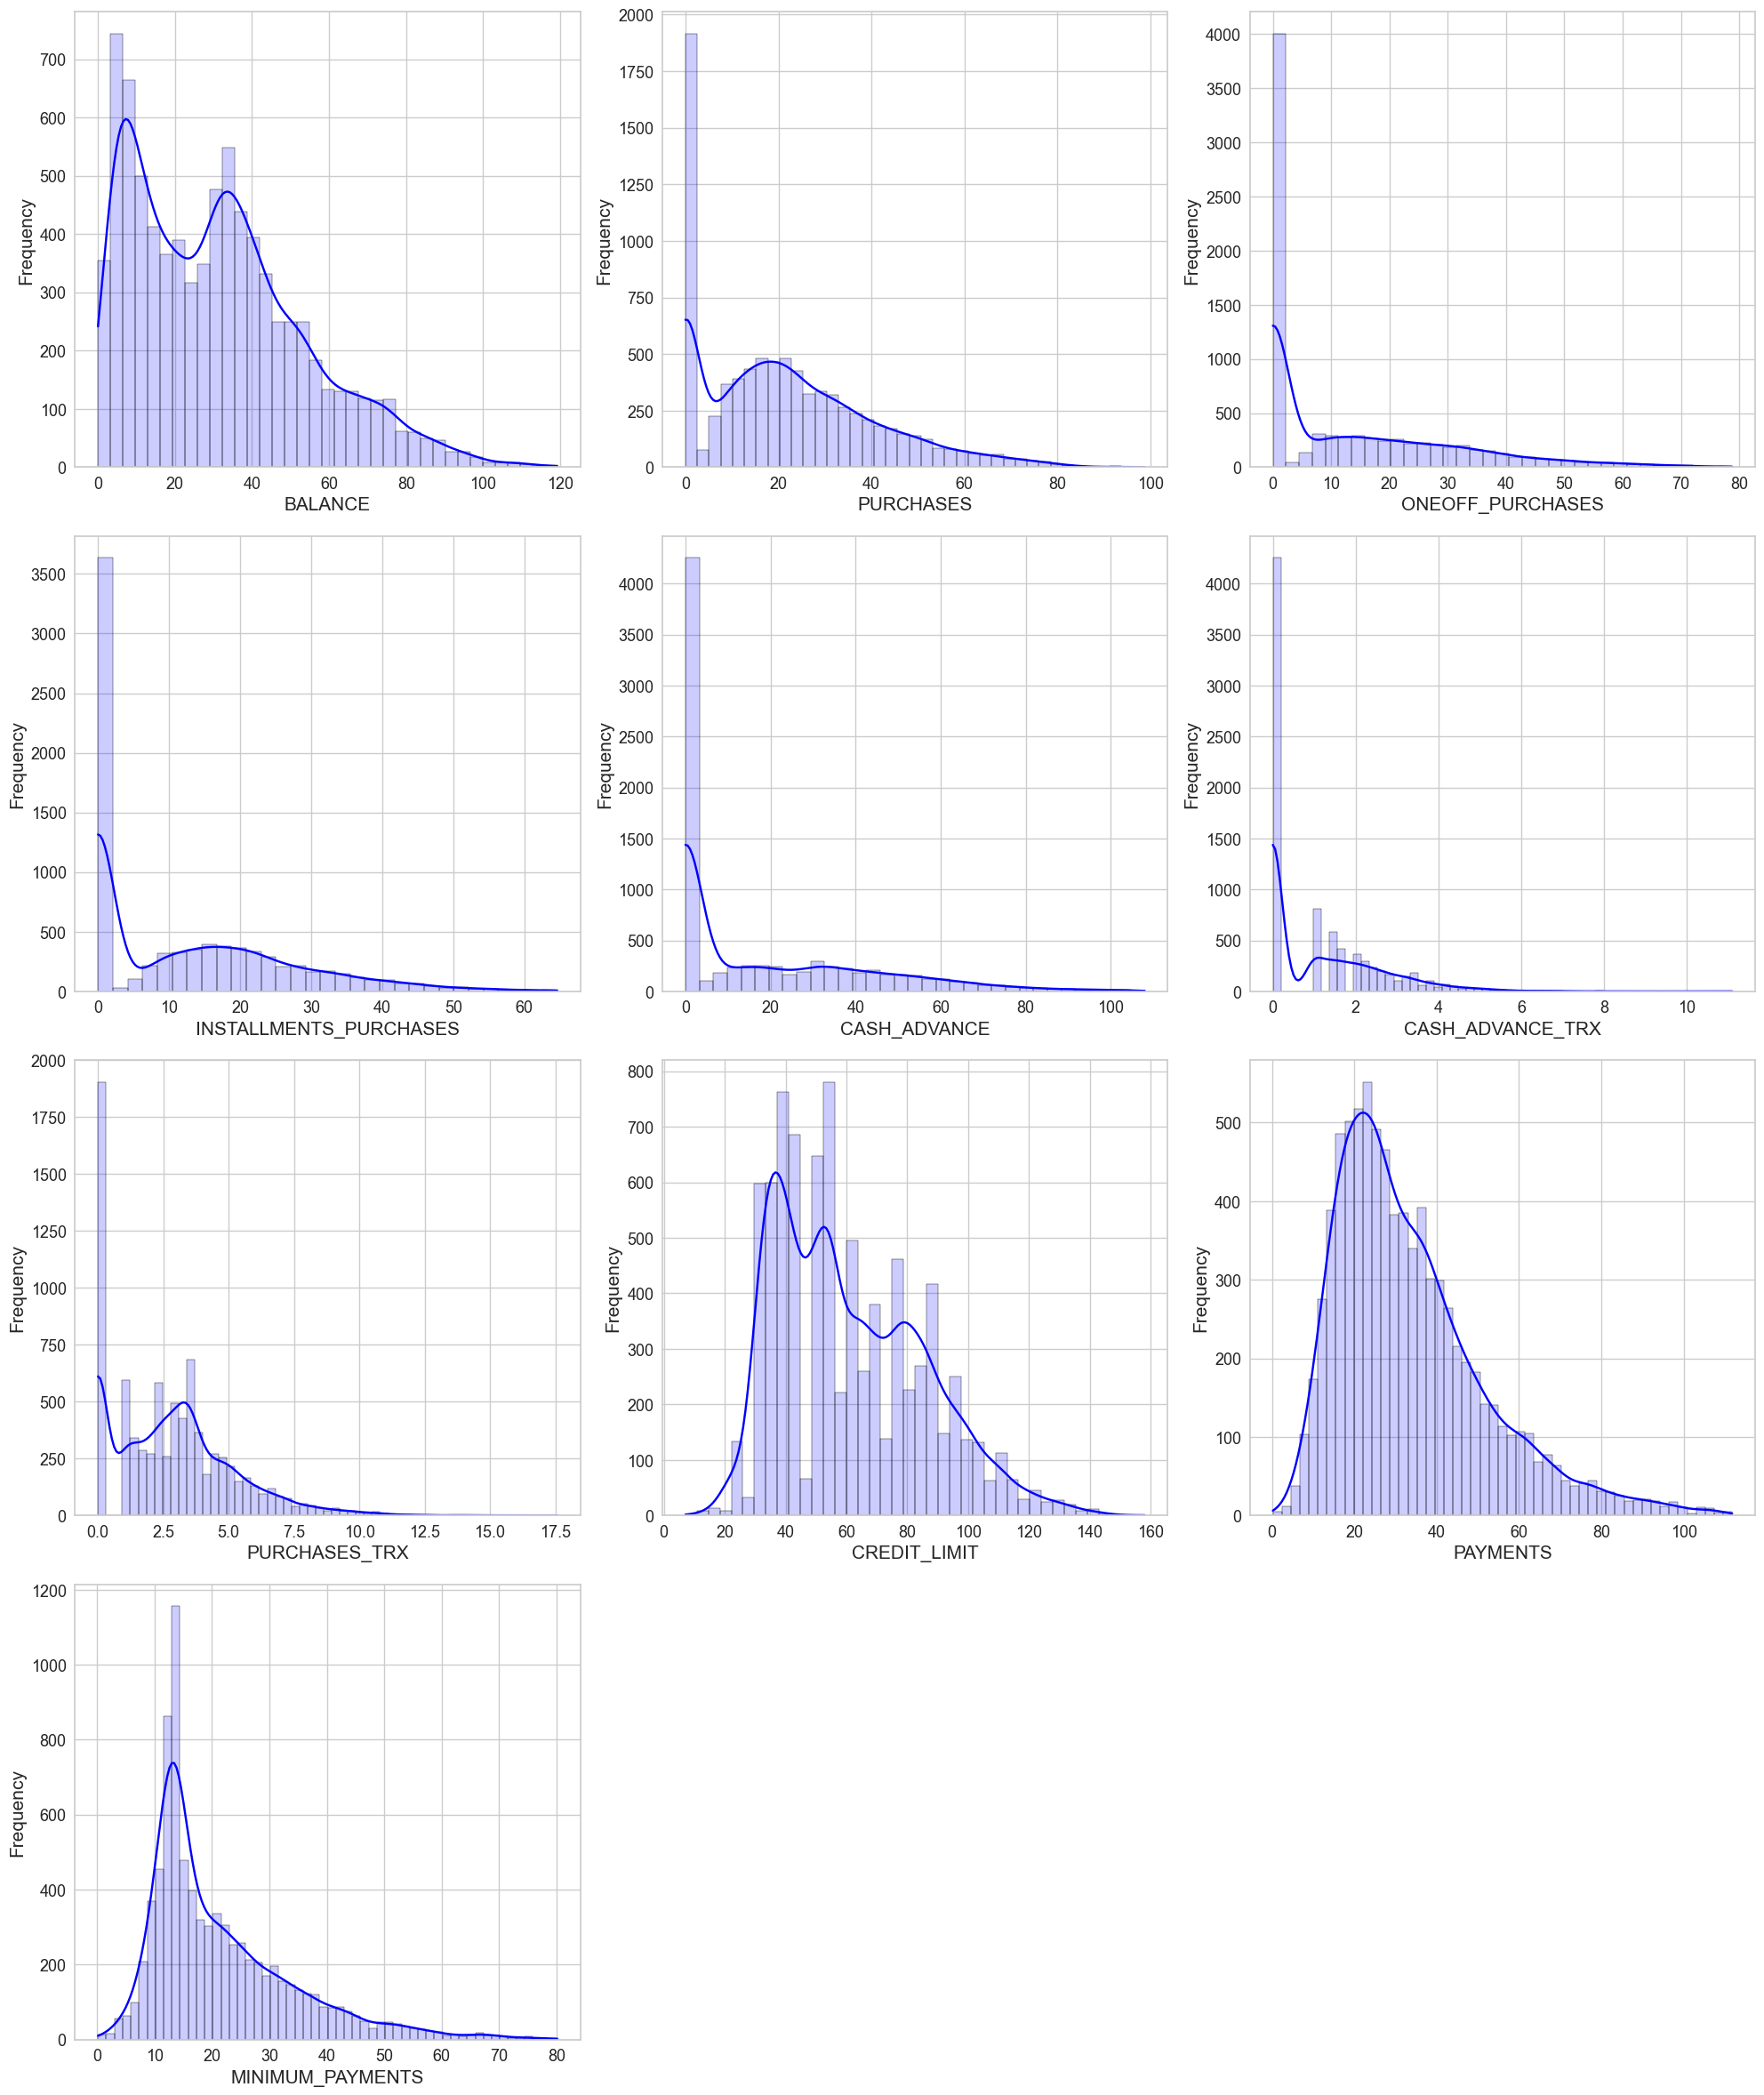

In [17]:
# Creating histograms after implementing feature engineering
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 3, i+1)
    sns.histplot(df, x = col, ax = ax, color = 'blue', kde = True, alpha = 0.2)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

# Preprocessing

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [19]:
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.106182,-0.356504,-0.635102,-0.786927,-0.192323,-0.756684,-0.807260,-0.677084,-0.706090,-0.684639,-0.786446,-0.587006,-1.215508,-1.065762,-0.771378,-0.533994,0.3596
1,1.120844,0.077898,-1.158925,-0.786927,-0.887597,2.610388,-1.224305,-0.677084,-0.916909,0.577341,0.645766,-1.186587,0.923233,1.667218,0.876061,0.221381,0.3596
2,0.826293,0.512301,0.332315,0.859109,-0.887597,-0.756684,1.277961,2.745328,-0.916909,-0.684639,-0.786446,0.282081,1.043911,-0.477186,0.270055,-0.533994,0.3596
3,-0.121209,0.512301,-0.944404,-0.550138,-0.887597,-0.756684,-1.015783,-0.391884,-0.916909,-0.684639,-0.786446,-0.762619,-1.091472,-0.416681,-0.469642,-0.533994,0.3596
4,0.497557,0.512301,0.799337,-0.786927,1.711620,-0.756684,0.443873,-0.677084,0.558829,-0.684639,-0.786446,0.012576,-0.771528,0.206815,2.160092,-0.533994,0.3596


# Dimensionality reduction

In [20]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

In [21]:
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.852428,-2.686980,-0.011022,-0.892896,-0.116619,-0.376592,0.546498,0.108219,0.240879,0.286099,-0.016126,0.446080,0.200311,0.153026,-0.182379,0.012029,-0.020774
1,-3.218913,1.911325,0.285564,0.533041,1.735744,0.153936,-0.636204,0.689472,0.436061,-0.836085,-0.969145,0.132494,0.001280,0.005679,-0.394783,-0.247353,-0.030628
2,1.416627,0.880417,2.167768,-1.607995,-1.079052,0.220992,-0.864810,-1.006294,-0.645548,-1.269900,0.344744,0.415993,-0.071369,-0.633733,-0.147022,0.588221,-0.018342
3,-1.343012,-1.771903,0.407524,-1.493375,-0.283398,-0.499078,-0.221567,0.597042,0.515872,-0.080887,0.104272,0.191064,-0.337403,0.110704,-0.052010,-0.056836,-0.019693
4,1.045137,0.468598,-1.940282,-1.713909,0.405529,0.724935,0.395382,1.553889,-0.507194,0.479478,0.398506,0.588063,0.716921,-0.360810,-0.265252,0.208291,0.139342


# K-Means Model

In [22]:
kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1, 10)]

In [23]:
# Utilizing WCSS sebagai metrik untuk memilih jumlah klaster menggunakan elbow method.
inertias = [model.inertia_ for model in kmeans_models]

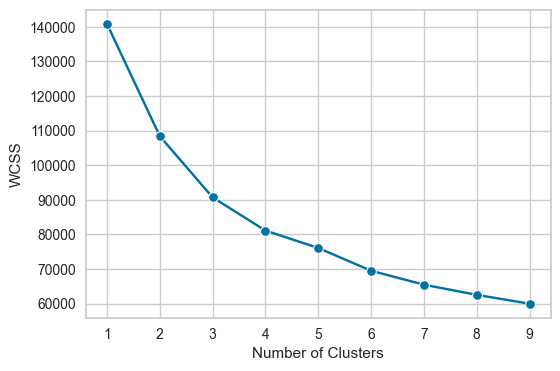

In [24]:
fig = plt.figure(figsize = (6,4))
sns.lineplot(x = list(range(1, 10)), y = inertias, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 3, random_state=0)

pca_labels = kmeans.fit_predict(X_pca)

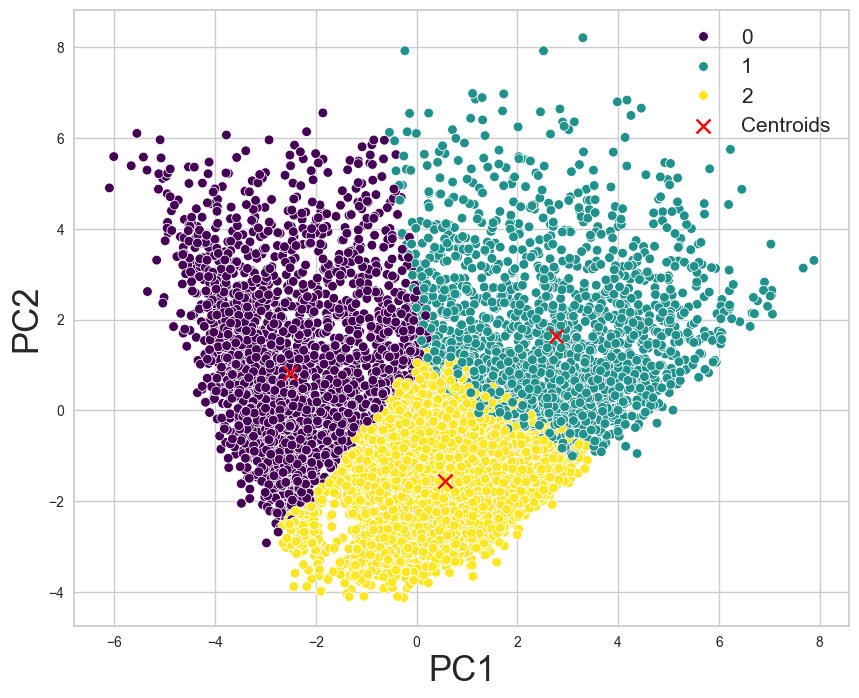

In [26]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue=pca_labels, palette='viridis')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

plt.xlabel("PC1", fontsize=25)
plt.ylabel("PC2", fontsize=25)
plt.legend(fontsize=15)

plt.show()


In [27]:
def feature_engg(column):
    column = np.square(column)
    return column

for col in cols:
    df[col] = df[col].apply(feature_engg)

In [28]:
df['cluster'] = pca_labels
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12,2


In [29]:
df['Cluster'] = df['cluster']

cluster_characteristics = df.groupby('Cluster').agg({
    'BALANCE': ['mean'],
    'BALANCE_FREQUENCY': ['mean'],
    'PURCHASES': ['mean'],
    'ONEOFF_PURCHASES': ['mean'],
    'INSTALLMENTS_PURCHASES': ['mean'],
    'CASH_ADVANCE': ['mean'],
    'PURCHASES_FREQUENCY': ['mean'],
    'ONEOFF_PURCHASES_FREQUENCY': ['mean'],
    'PURCHASES_INSTALLMENTS_FREQUENCY': ['mean'],
    'CASH_ADVANCE_FREQUENCY': ['mean'],
    'CASH_ADVANCE_TRX': ['mean'],
    'PURCHASES_TRX': ['mean'],
    'CREDIT_LIMIT': ['mean'],
    'PAYMENTS': ['mean'],
    'MINIMUM_PAYMENTS': ['mean'],
    'PRC_FULL_PAYMENT': ['mean'],
    'TENURE': ['mean']
})

cluster_characteristics.columns = [' '.join(col).strip() for col in cluster_characteristics.columns.values]
cluster_characteristics


,BALANCE mean,BALANCE_FREQUENCY mean,PURCHASES mean,ONEOFF_PURCHASES mean,INSTALLMENTS_PURCHASES mean,CASH_ADVANCE mean,PURCHASES_FREQUENCY mean,ONEOFF_PURCHASES_FREQUENCY mean,PURCHASES_INSTALLMENTS_FREQUENCY mean,CASH_ADVANCE_FREQUENCY mean,CASH_ADVANCE_TRX mean,PURCHASES_TRX mean,CREDIT_LIMIT mean,PAYMENTS mean,MINIMUM_PAYMENTS mean,PRC_FULL_PAYMENT mean,TENURE mean
Cluster,,,,,,,,,,,,,,,,,
0,2516.746572,0.942150,155.558359,109.502957,46.097781,2102.106752,0.128324,0.060209,0.068147,0.308756,7.374086,2.245559,4437.572697,1659.829973,909.388057,0.028913,11.377569
1,1913.975278,0.978471,2390.493632,1481.336158,909.183155,580.289947,0.894155,0.561351,0.650169,0.087648,2.016771,37.380503,6280.991519,2536.580830,830.223155,0.206846,11.849057
2,417.743395,0.805789,496.963865,196.246038,301.257725,75.176100,0.564477,0.112762,0.446793,0.020033,0.323831,9.477480,3198.809892,721.968911,289.243671,0.234941,11.465222


Klaster 0:
- Rata-rata saldo yang relatif rendah (sekitar 2526.77).
- Frekuensi pembelian yang rendah (0.94), dengan jumlah pembelian rata-rata sekitar 157.80.
- Pembelian dalam jumlah besar (one-off purchases) dan pembelian cicilan (installments purchases) dilakukan dengan frekuensi yang rendah.
- Cenderung menggunakan fitur cash advance dengan frekuensi yang cukup tinggi (0.31).
- Jumlah transaksi cash advance (cash advance trx) relatif tinggi (7.39).
- Batas kredit sedang (4446.19) dengan pembayaran rata-rata yang cukup tinggi (1662.66).
- Tidak banyak melakukan pembayaran penuh (full payment).

Klaster 1:
- Rata-rata saldo yang lebih tinggi (sekitar 1896.68).
- Frekuensi pembelian yang tinggi (0.97), dengan jumlah pembelian rata-rata yang signifikan (2386.28).
- Pembelian dalam jumlah besar dan pembelian cicilan dilakukan dengan frekuensi yang tinggi.
- Jarang menggunakan fitur cash advance.
- Batas kredit yang tinggi (6273.42) dengan pembayaran rata-rata yang cukup tinggi (2531.19).
- Relatif lebih sering melakukan pembayaran penuh.

Klaster 2:
- Rata-rata saldo yang sangat rendah (sekitar 417.02).
- Frekuensi pembelian yang rendah (0.80), dengan jumlah pembelian rata-rata yang cukup rendah (494.09).
- Pembelian dalam jumlah besar dan pembelian cicilan dilakukan dengan frekuensi yang rendah.
- Jarang menggunakan fitur cash advance.
- Batas kredit yang rendah.
- Pembayaran minimum juga relatif rendah.
- Tidak banyak melakukan pembayaran penuh.

Dengan demikian, kita dapat menyimpulkan bahwa:
- Klaster 0 cenderung menjadi pelanggan dengan perilaku konservatif, menggunakan batas kredit mereka dengan hati-hati dan jarang melakukan pembayaran penuh.
- Klaster 1 mencakup pelanggan dengan pendapatan yang lebih tinggi, memiliki saldo yang lebih besar, melakukan pembelian yang lebih sering, dan lebih cenderung untuk membayar penuh.
- Klaster 2 berisi pelanggan dengan profil keuangan yang lebih rentan, memiliki saldo dan batas kredit yang rendah, dan melakukan pembelian dengan frekuensi yang lebih rendah.